# Outliers 

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32

https://medium.com/codezillas/statistics-review-for-data-scientists-and-management-df8f94760221

https://www.letthedataconfess.com/how-to-detect-and-treat-outliers/

https://github.com/krishnaik06/Finding-an-Outlier/blob/master/Finding%20an%20outlier%20in%20a%20Dataset.ipynb

## Outliers will affect the model if algorithms that are based on euclidean distances are used….decision trees,xgboost,random-forest are insensitive to outliers. Use Z-Score or IQR to tackle the outliers

In statistics, an outlier is an observation point that is fa frr away from other observations.

The above definition suggests that outlier is something which is separate/different from the crowd

There are two types of analysis we will follow to find the outliers- 

Uni-variate(one variable outlier analysis using box plot) and Multi-variate(two or more variable outlier analysis using scatter plot).

Discover outliers with visualization tools - Box plot-Wikipedia Definition,

from scipy import stats   
import numpy as np    
z = np.abs(stats.zscore(boston_df))   
print(z) 


The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

How can we identify an outlier?   

1) using scatter plots   - Perform Standard Deviation

2) using Z score   - Perform Standard Deviation

3) using the IQR interquartile range   - Perform IQR

4) Box plot for univarient analysis.  - Perform IQR

#### We cannot remove outliers always. it depends on data. Like if we have data like weight in which most of people have weight range between 50 - 70 and 5 people have weigth 100. so we would not remove outliers.

If we have atleast 30% of data is outliers then there should be interesting in data and we would not removed outliers.

if data is skewd then we use IQR method else if data is normally distributed then IQR and standard deviation method performs well in both cases.

Steps to calculate Quartiles 

1) Sort the data in asc or dec order.

2) Q1 (First Quartiles or Lower Quartiles) = (n+1)/4 = 25% of the data fall below this point.

3) Q2 (Second Quartiles) = (n+1)/2 = Median

4) Q3 (Third Quartile/Upper Quartile)=3(n+1)/4th item

5) Q4=Highest observation

#### Let’s see example

Find Q1,Q3 of following dataset [3,8,5,2,6,9,4,10,7]

Solution:Here n=9, First sort the dataset   2,3,4,5,6,7,8,9,10 

Q1=(n+1)/4 th element=10/4=(2.5)th element. Now whenever there is fraction comes with respect to position,there is little bit different calculation we need to perform

Q1=2nd item+0.5(4th element – 3rd element) OR Q1=avg(2nd element,3rd element)

Q1=3+0.5(5-4)=3.5

Q1=3.5 indicates that 25% values are less than or equal to 3.5

Similarly, let’s calculate Q2=(n+2)/2 th element =(9+1)/2=10/2=5thelement = 6 value 

Q2=6 As mentioned above, the 2nd quartile is the median value. So, Q2 indicates that 50% values are less than or equal to 6.

Similarly,Q3=3(n+1)/4 th element=3(10)/4=7.5 th element. Here also fraction value comes.

Q3=7th element+0.5(9th element-8th element) OR Q3=avg(7th element,8th element)

Q3=8+0.5(10-9)=8.5 implies 75% values are less than 8.5.

There may be a possibility that with two approaches we get two different values, but they will have very small differences and it will not matter for data analysis.

InterQuartile Range(IQR)=Q3-Q1. So in above example IQR is 5. 

##### Now, we will see how IQR helps us to detect outliers.

The values outside the following interval, will be treated as outlier.[Q1-1.5(IQR),Q3+1.5(IQR)] 

So in the above example, the values outside the interval [3.5-1.5(5),7.5+1.5(5)] i.e. [-4,15] are outliers.

So here we can conclude that in the dataset [2,3,4,5,6,7,8,9,10] there are no outliers

#### In case of normal distribution if data points lie away from the range [(μ + 3σ) , (μ — 3σ)] is considered as outliers.Where μ is the mean value.

Now, One can ask if I applied two methods(IQR & SD) on a normally distributed particular dataset, which will give me more outliers?We will get more outliers by IQR methods. But it doesn’t matter by which method you count outliers, since the count difference is very small and doesn’t matter when the dataset is large enough

In [ ]:
Detect the outlier using python 

1) using scatter plot
2) using box plot
3) using zscore
4) using IQR range


#### Scatter plot 

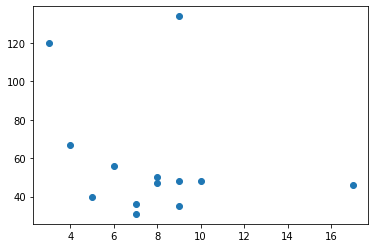

In [8]:
import matplotlib.pyplot as plt
x = [5,7,8,10,3,17,4,9,7,9,8,9,6]
y = [40,36,47,48,120,46,67,48,31,134,50,35,56]
plt.scatter(x,y)
plt.show()

#### Box plot

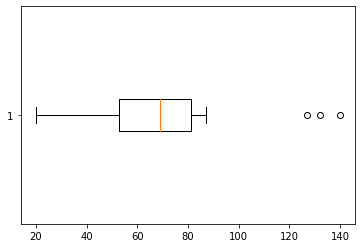

In [9]:
import matplotlib.pyplot as plt
data =[20,25,27,75,40,67,62,75,78,71,32,82,127,140,78,67,132,82,87,66,56,52]         
plt.boxplot(data,vert=False)
plt.show()

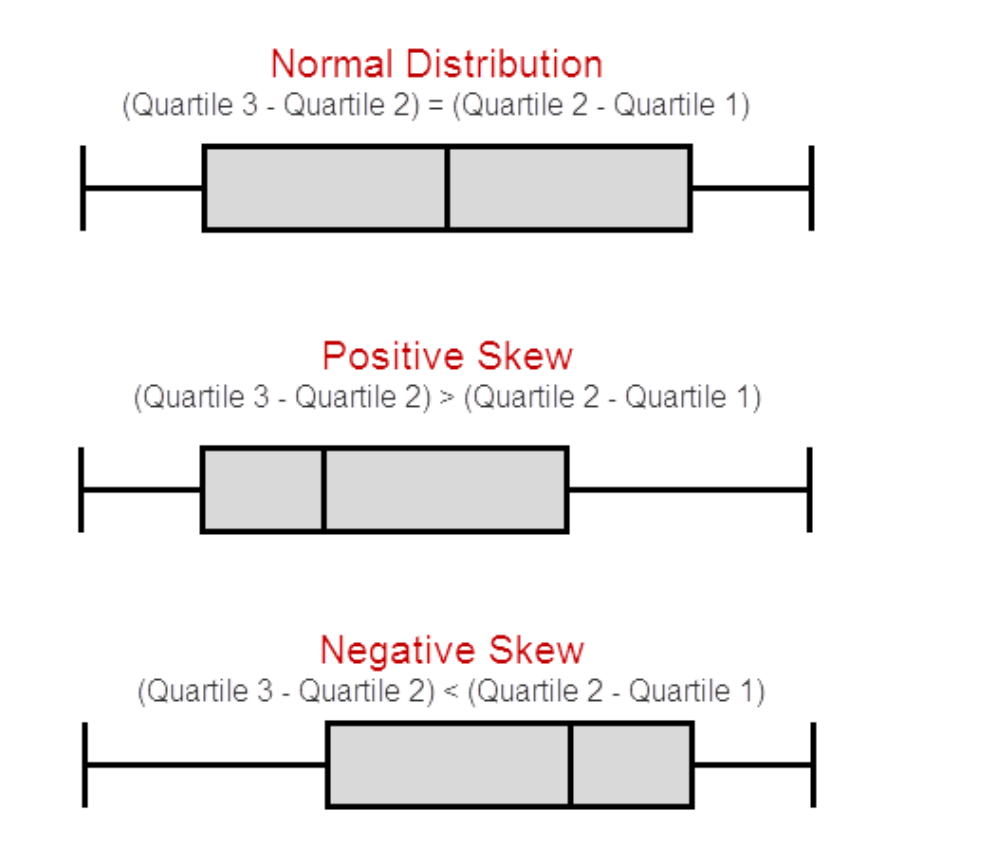

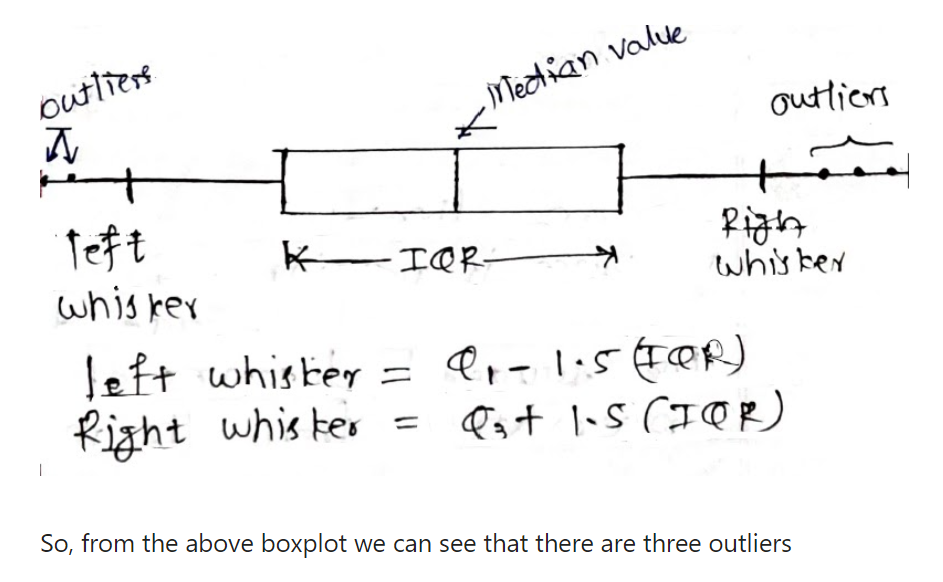

#### Using Z score 

Z-score = (Observation — Mean)/Standard Deviation 

Z=(X-μ)/𝛔.

Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 3 standard deviations

In [22]:
import numpy as np
outliers=[]
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in dataset:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers;


outlier_pt=detect_outliers(dataset)
print(outlier_pt)

[102, 107, 108]


### Using Interquartile Range

In [23]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

dataset=sorted(dataset)
q1, q3= np.percentile(dataset,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print('lower_bound={},upper_bound={}'.format(lower_bound,upper_bound))

outliers_pt=[]
for x in dataset:
    if x<lower_bound or x>upper_bound:
        outliers_pt.append(x)

outliers_pt

lower_bound=7.5,upper_bound=19.5


[102, 107, 108]

In [6]:
# from urllib.request import urlopen
# from bs4 import BeautifulSoup

# url = "https://www.letthedataconfess.com/how-to-detect-and-treat-outliers/"
# html = urlopen(url).read()
# soup = BeautifulSoup(html, features="html.parser")

# # kill all script and style elements
# for script in soup(["script", "style"]):
#     script.extract()    # rip it out

# # get text
# text = soup.get_text()

# # break into lines and remove leading and trailing space on each
# lines = (line.strip() for line in text.splitlines())
# # break multi-headlines into a line each
# chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# # drop blank lines
# text = '\n'.join(chunk for chunk in chunks if chunk)

# print(text)

How to detect and treat outliers in the given dataset
Skip to content
Let The Data Confess
Understand | Learn | Code | Implement
Menu
Menu HomeBlogTake the test!About Us
How to detect and treat outliers
February 1, 2021February 1, 2021 by arpita
Read Time:
6 minIn this article, we are going to understand in-depth and detail about outlier-Statistical and Programming approaches, how to detect and treat outliers so that they won’t screw up the model performance. So read this article till the end, you will get to know how important outliers are while data-preprocessing.Table of contentWhy study outlier?What is an outlier?Should we remove the outlier?Techniques to detect outliersUsing Scatter plot graph.Using Box plot graph.  Using Z_score method (Normally distributed Data).Using the IQR interquartile range.One may ask why to study outlier?Suppose in one school, a new coach has been working with the Long Jump team this month, and the athletes’ performance has changed. Sam can now jump 0.15m